In [1]:
import random
import math
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
random.seed(11915043)

<H2> P1 : IRIS – HIERARCHICAL FISHER </H2>

In [3]:
iris = pd.read_csv('DMG-2 Assignment Data Files/iris/iris.data', header=None, names =
                   ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
iris.sample(5)

,sepal length,sepal width,petal length,petal width,class
137,6.4,3.1,5.5,1.8,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica
69,5.6,2.5,3.9,1.1,Iris-versicolor
13,4.3,3.0,1.1,0.1,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa


### Two classes in IRIS are more “similar” to each other. Find which ones using scatter plots. Lets say class 1 and class 2.

As seen in plots below 'Iris-versicolor' and 'Iris-virginica' are more similar to each other

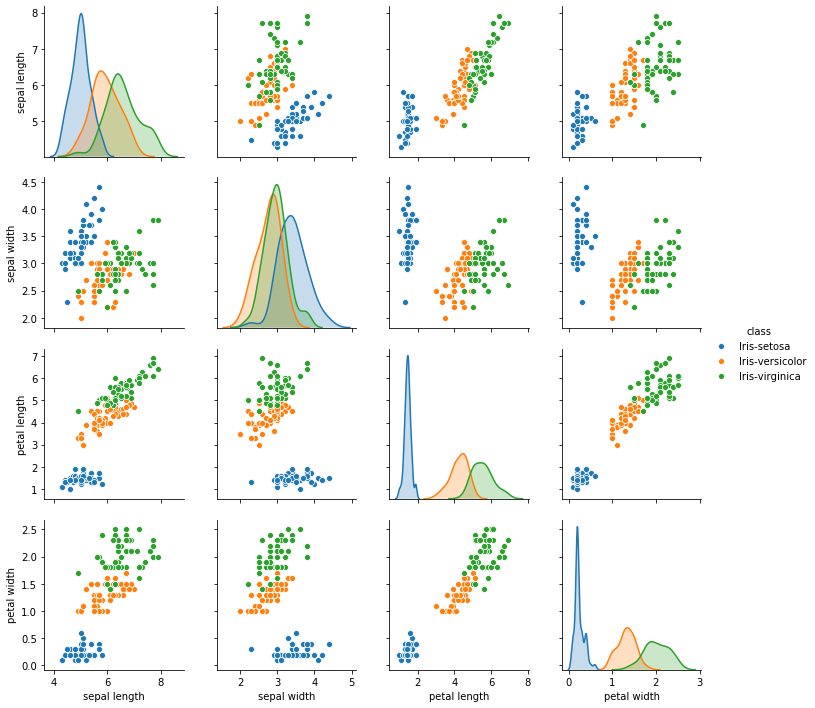

In [4]:
sns.pairplot(iris, hue = 'class')

### Lets create a “meta class” combining class 1 and class 2 (or whichever are the two most similar classes). Lets call it class 4.

In [5]:
iris['versi-virgi'] = np.where((iris['class'] == 'Iris-versicolor') | (iris['class'] == 'Iris-virginica'), 1, 0)
iris.sample(5)

,sepal length,sepal width,petal length,petal width,class,versi-virgi
76,6.8,2.8,4.8,1.4,Iris-versicolor,1
74,6.4,2.9,4.3,1.3,Iris-versicolor,1
18,5.7,3.8,1.7,0.3,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
48,5.3,3.7,1.5,0.2,Iris-setosa,0


In [6]:
train, test = train_test_split(iris, test_size=0.3)

/Users/anmol/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


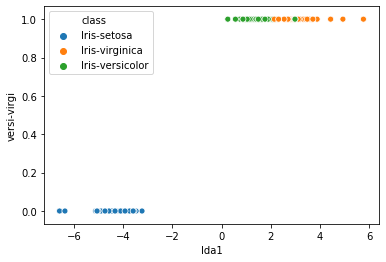

In [7]:
#Ref https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

lda = LinearDiscriminantAnalysis()
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = 'versi-virgi'

lda1 = lda.fit(train[features], train[target])
lda1_dis = lda1.transform(train[features])
train['lda1'] = lda1_dis

ax = sns.scatterplot(x="lda1", y="versi-virgi", hue="class", data=train)


/Users/anmol/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/anmol/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


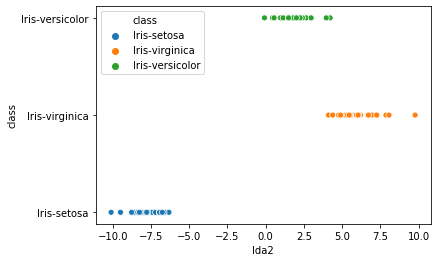

In [8]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width','lda1']
target = 'class'

lda = LinearDiscriminantAnalysis(n_components=1)
lda2 = lda.fit(train[features], train[target])
lda2_dis = lda2.transform(train[features])
train['lda2'] = lda2_dis

ax = sns.scatterplot(x="lda2", y="class", hue="class", data=train)

In [9]:
test['lda1'] = lda1.transform(test[['sepal length', 'sepal width', 'petal length', 'petal width']])
test['lda2'] = lda2.transform(test[['sepal length', 'sepal width', 'petal length', 'petal width', 'lda1']])

/Users/anmol/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/anmol/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


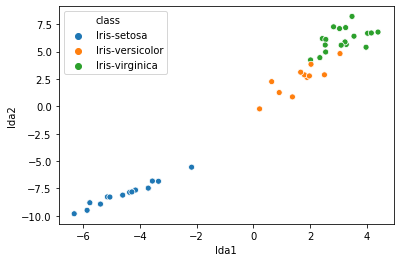

In [10]:
ax = sns.scatterplot(x="lda1", y="lda2", hue="class", data=test)

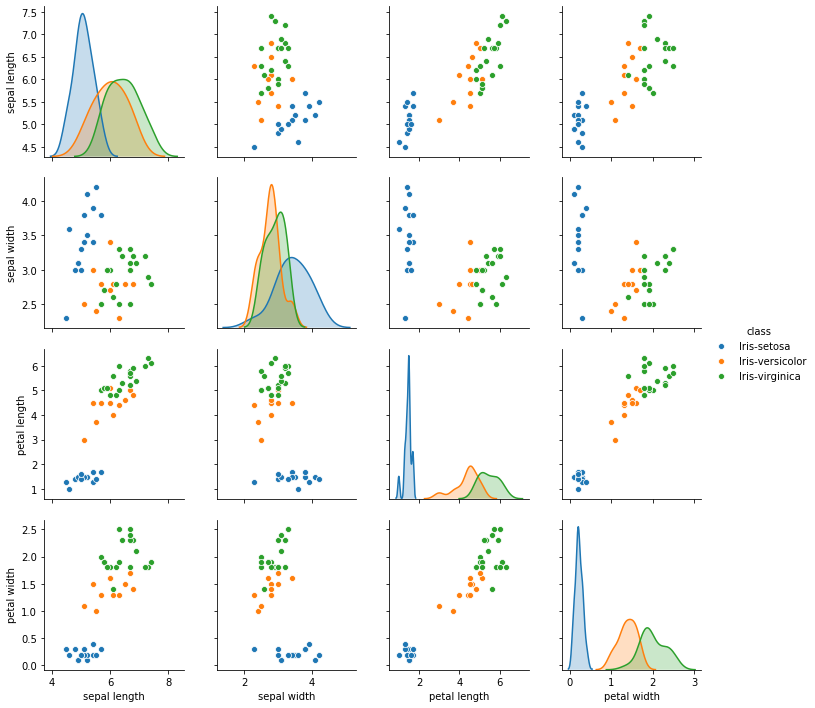

In [11]:
sns.pairplot(hue='class', data=test[['sepal length', 'sepal width', 'petal length', 'petal width', 'class']])

<H2> P2 : MUSHROOM information gain </H2>

Take the MUSHROOM training data. There are 20+ features and 2 classes. We want to find the BEST feature using the three purity measures: Accuracy, Gini Index, and Entropy.

In [12]:
col_names = ['class',
             'cap-shape',
             'cap-surface',
             'cap-color',
             'bruises',
             'odor',
             'gill-attachment',
             'gill-spacing',
             'gill-size',
             'gill-color',
             'stalk-shape',
             'stalk-root',
             'stalk-surface-above-ring',
             'stalk-surface-below-ring',
             'stalk-color-above-ring',
             'stalk-color-below-ring',
             'veil-type',
             'veil-color',
             'ring-number',
             'ring-type',
             'spore-print-color',
             'population',
             'habitat']
mushroom = pd.read_csv('DMG-2 Assignment Data Files/Mushroom/agaricus-lepiota.data',
                       index_col=None,
                       header=None,
                       names=col_names)
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### For each feature, partition the data into k regions where k is the number of values the feature can take.

- Take one feature at a time from dataframe
- create a subset of data with that feature and class labels
- Groupby count to partition data into K features where k is no of values feature can take

#### Now, for each partition 
- 

In [13]:
result_set = pd.DataFrame(columns = ['Feature', 'Accuracy', 'Gini', '1-Entropy'])
result_set

,Feature,Accuracy,Gini,1-Entropy


In [14]:
total_rows_data = mushroom.shape[0]

for column in col_names[1:] :
    df_feature_subset = mushroom[[column,'class']]
    feature_partition = df_feature_subset.groupby([column,'class']).size().unstack(fill_value=0)
    print(feature_partition)
    
    #Ref : https://towardsdatascience.com/gini-index-vs-information-entropy-7a7e4fed3fcb
    for index, row in feature_partition.iterrows():
        partition_total_sum = row['e'] + row['p']
        prob_e_class = row['e']/partition_total_sum
        prob_p_class = row['p']/partition_total_sum

        # calculate accuracy for each partition
        if(row['e'] > row['p']) :
            feature_partition.at[index,'Parition Accuracy'] = prob_e_class
        else :
            feature_partition.at[index,'Parition Accuracy'] = prob_p_class
        feature_partition.at[index,'Weighted Accuracy'] = partition_total_sum*feature_partition.loc[index,'Parition Accuracy']/total_rows_data

        #calculate gini index for each partition
        feature_partition.at[index,'Gini Index'] = 1 - (prob_e_class**2 + prob_p_class**2)
        feature_partition.at[index,'Weighted Gini Index'] = partition_total_sum*feature_partition.loc[index,'Gini Index']/total_rows_data

        #calculate entropy for each partition
        entropy = 0
        if(prob_e_class > 0) :
            entropy += prob_e_class*math.log2(prob_e_class)
        if(prob_p_class > 0) :
            entropy += prob_p_class*math.log2(prob_p_class)
        feature_partition.at[index,'Entropy'] = -1*entropy
        feature_partition.at[index,'Weighted Entropy'] = partition_total_sum*feature_partition.loc[index,'Entropy']/total_rows_data
    
    result_set = result_set.append({'Feature' : column, 
                       'Accuracy': feature_partition[['Weighted Accuracy']].sum()[0].round(4),
                       'Gini' : feature_partition[['Weighted Gini Index']].sum()[0].round(4),
                       '1-Entropy': 1-feature_partition[['Weighted Entropy']].sum()[0].round(4)}, ignore_index=True)
    
result_set.head()

class         e     p
cap-shape            
b           404    48
c             0     4
f          1596  1556
k           228   600
s            32     0
x          1948  1708
class           e     p
cap-surface            
f            1560   760
g               0     4
s            1144  1412
y            1504  1740
class         e     p
cap-color            
b            48   120
c            32    12
e           624   876
g          1032   808
n          1264  1020
p            56    88
r            16     0
u            16     0
w           720   320
y           400   672
class       e     p
bruises            
f        1456  3292
t        2752   624
class     e     p
odor             
a       400     0
c         0   192
f         0  2160
l       400     0
m         0    36
n      3408   120
p         0   256
s         0   576
y         0   576
class               e     p
gill-attachment            
a                 192    18
f                4016  3898
class            e     p
g

,Feature,Accuracy,Gini,1-Entropy
0,cap-shape,0.5643,0.4692,0.0497
1,cap-surface,0.5805,0.4800,0.0295
2,cap-color,0.5953,0.4755,0.0370
3,bruises,0.7440,0.3738,0.1933
4,odor,0.9852,0.0285,0.9070


In [15]:
result_set.tail()

,Feature,Accuracy,Gini,1-Entropy
17,ring-number,0.5382,0.4763,0.0394
18,ring-type,0.7755,0.3176,0.3190
19,spore-print-color,0.8680,0.2165,0.4816
20,population,0.7218,0.3807,0.2029
21,habitat,0.6903,0.4026,0.1578


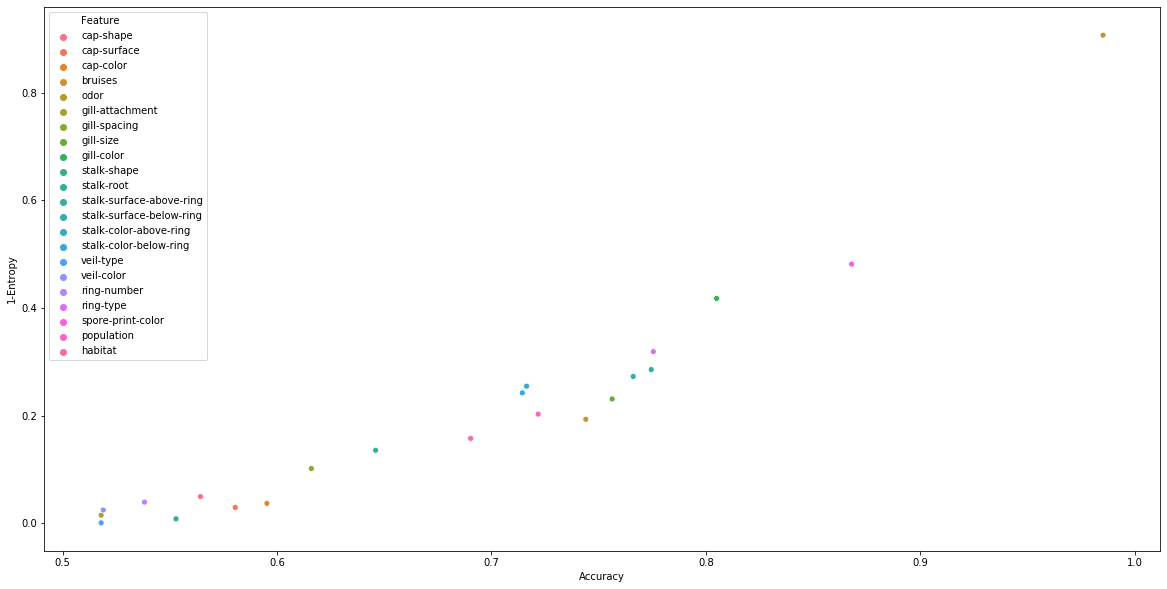

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(x='Accuracy', y='1-Entropy', hue='Feature', data=result_set)

In [17]:
result_set

,Feature,Accuracy,Gini,1-Entropy
0,cap-shape,0.5643,0.4692,0.0497
1,cap-surface,0.5805,0.4800,0.0295
2,cap-color,0.5953,0.4755,0.0370
3,bruises,0.7440,0.3738,0.1933
4,odor,0.9852,0.0285,0.9070
5,gill-attachment,0.5180,0.4910,0.0151
6,gill-spacing,0.6160,0.4387,0.1018
7,gill-size,0.7563,0.3537,0.2311
8,gill-color,0.8050,0.2679,0.4179
9,stalk-shape,0.5529,0.4942,0.0084
